In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Generalized variables
textwidth_cm = 16.50764  # Text width in cm
aspect_ratio = 0.618     # Aspect ratio (height/width) using the golden ratio

# Font sizes
label_fontsize = 12
legend_fontsize = 12
tick_fontsize = 10
colorbar_label_fontsize = 12
colorbar_tick_fontsize = 10
offset_text_fontsize = 12
tick_fontsize = 10
errorbar_capsize = 5

# Convert text width from cm to inches
textwidth_in = textwidth_cm / 2.54

# Calculate figure size based on text width and aspect ratio
fig_width = textwidth_in
fig_height = textwidth_in * aspect_ratio

save_dir = '/home/pkruyt/cernbox/figures_thesis/betacool_benchmark/'

<>:23: SyntaxWarning: invalid escape sequence '\D'
<>:23: SyntaxWarning: invalid escape sequence '\D'
/tmp/pkruyt/ipykernel_38178/40648821.py:23: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta$v [m/s]', fontsize=label_fontsize)
/tmp/pkruyt/ipykernel_38178/40648821.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


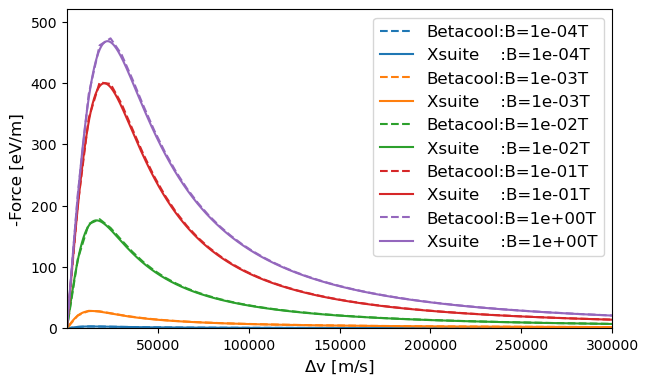

In [2]:
import numpy as np
import matplotlib.pyplot as plt

magnetic_field_list = [0.0001,0.001,0.01,0.1,1] # Tesla

def load_data(module,magnetic_field):
    filename = f"results/force_{module}_B={magnetic_field:.0e}.npz"
    data = np.load(filename)
    v_diff = data['v_diff']
    force = data['force']
    return v_diff,force

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(fig_width, fig_height))
plt.rcParams.update({'font.size': label_fontsize})

for i,magnetic_field in enumerate(magnetic_field_list):
    v_diff,force = load_data('betacool',magnetic_field)
    plt.plot(v_diff, -force, label=f'Betacool:B={magnetic_field:.0e}T',color=cmap(i),linestyle='--')
    v_diff,force= load_data('xsuite',magnetic_field)
    plt.plot(v_diff, -force, label=f'Xsuite    :B={magnetic_field:.0e}T',color=cmap(i))

plt.xlabel('$\Delta$v [m/s]', fontsize=label_fontsize)
plt.ylabel('-Force [eV/m]', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=tick_fontsize)
plt.tight_layout()
plt.xlim([1,3e5])
plt.axis(ymin = 0)
image_name = 'LEIR_force_magnetic_field.png'
save_location = os.path.join(save_dir, image_name)
plt.savefig(save_location, dpi=300, bbox_inches='tight')
plt.show()